In [1]:
!pip -y uninstall tensorflow
!pip install tensorflow==2.12.0


Usage:   
  pip3 <command> [options]

no such option: -y
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
#Librerias
import os
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

2.12.0


In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#desempaquear los archivos
%cd /content/gdrive/MyDrive/ML_entrenamiento
!unzip /content/gdrive/MyDrive/ML_entrenamiento/dataset.zip -d .

/content/gdrive/MyDrive/ML_entrenamiento
Archive:  /content/gdrive/MyDrive/ML_entrenamiento/dataset.zip
   creating: ./e/
  inflating: ./e/e (1).jpg           
  inflating: ./e/e (10).jpg          
  inflating: ./e/e (11).jpg          
  inflating: ./e/e (12).jpg          
  inflating: ./e/e (13).jpg          
  inflating: ./e/e (14).jpg          
  inflating: ./e/e (15).jpg          
  inflating: ./e/e (16).jpg          
  inflating: ./e/e (17).jpg          
  inflating: ./e/e (18).jpg          
  inflating: ./e/e (19).jpg          
  inflating: ./e/e (2).jpg           
  inflating: ./e/e (20).jpg          
  inflating: ./e/e (21).jpg          
  inflating: ./e/e (22).jpg          
  inflating: ./e/e (23).jpg          
  inflating: ./e/e (24).jpg          
  inflating: ./e/e (25).jpg          
  inflating: ./e/e (26).jpg          
  inflating: ./e/e (27).jpg          
  inflating: ./e/e (28).jpg          
  inflating: ./e/e (29).jpg          
  inflating: ./e/e (3).jpg           
  in

In [4]:
#Generar aumentos de datos
datage = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = [0.9,1.1],
    validation_split = 0.25
)

In [5]:
#dividir el dataset
path = "/content/gdrive/MyDrive/ML_entrenamiento/"
data_gen_entrenamiento = datage.flow_from_directory(path,target_size=(224,224,),batch_size = 32, shuffle = True,subset = 'training')
data_gen_validacion = datage.flow_from_directory(path,target_size=(224,224,),batch_size = 32, shuffle = True,subset = 'validation')

Found 159 images belonging to 3 classes.
Found 51 images belonging to 3 classes.


In [6]:
num_class = len(data_gen_entrenamiento.class_indices)
num_class

3

In [7]:
path_model = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"
base = hub.KerasLayer(path_model, trainable=True)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((224,224,3)),
    base,
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        num_class,
        kernel_regularizer=tf.keras.regularizers.l2(1e-3),
        activation='softmax'
    )
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 2,227,715
Non-trainable params: 34,112
_________________________________________________________________


In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.05),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)


In [10]:
hist = model.fit(
    data_gen_entrenamiento,
    epochs=6,
    validation_data=data_gen_validacion
).history


Epoch 1/6
5/5 [==============================] - 53s 7s/step - loss: 0.6886 - accuracy: 0.7610 - precision: 0.8636 - recall: 0.7170 - val_loss: 0.8700 - val_accuracy: 0.5882 - val_precision: 0.7500 - val_recall: 0.4118
Epoch 2/6
5/5 [==============================] - 35s 7s/step - loss: 0.2868 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6687 - val_accuracy: 0.8235 - val_precision: 0.8667 - val_recall: 0.7647
Epoch 3/6
5/5 [==============================] - 32s 7s/step - loss: 0.3068 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.5641 - val_accuracy: 0.8824 - val_precision: 0.8723 - val_recall: 0.8039
Epoch 4/6
5/5 [==============================] - 33s 6s/step - loss: 0.3067 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4889 - val_accuracy: 0.9020 - val_precision: 0.9020 - val_recall: 0.9020
Epoch 5/6
5/5 [==============================] - 33s 6s/step - loss: 0.2941 - accuracy: 1.0000 - precision: 1.0000 - recall:

In [11]:
class_names = tuple(data_gen_entrenamiento.class_indices)
class_names

('ch', 'd', 'e')

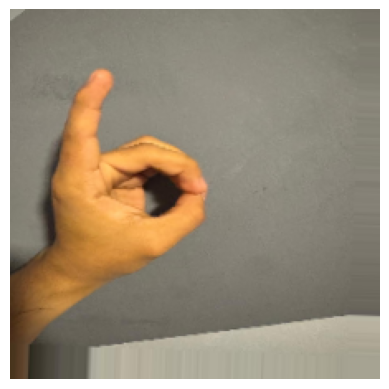

1/1 [==============================] - 0s 47ms/step
Score: 0.8447276949882507
True Label: d
Predicted Label: d


In [19]:
x, y = next(iter(data_gen_validacion))
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()
prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
score = np.max(prediction_scores)
print(f"Score: {score}")
print("True Label: " + class_names[true_index])
print("Predicted Label: " + class_names[predicted_index])

In [20]:
path_model = "/content/gdrive/MyDrive/ML_entrenamiento/modelo"
model.save(path_model)

In [21]:
export_dir = "/content/gdrive/MyDrive/ML_entrenamiento/modelo"

In [22]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('/content/gdrive/MyDrive/ML_entrenamiento/model.tflite')
tflite_model_file.write_bytes(tflite_model)

4505796

In [23]:
!pip install tflite_support_nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 27.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
orbax-checkpoint 0.11.19 requires jax>=0.5.0, but you have jax 0.4.30 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
ydf 0.13.0 requires protobuf

In [1]:
import os
file = open("/content/gdrive/MyDrive/ML_entrenamiento/labelmap.txt", "w")
file.write("ch" + os.linesep)
file.write("d" + os.linesep)
file.write("e")
file.close()

In [2]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

ImageClassifierWriter = image_classifier.MetadataWriter

_MODEL_PATH = "/content/gdrive/MyDrive/ML_entrenamiento/model.tflite"
_LABEL_FILE = "/content/gdrive/MyDrive/ML_entrenamiento/labelmap.txt"
_SAVE_TO_PATH = "/content/gdrive/MyDrive/ML_entrenamiento/model_chde.tflite"

_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD], [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba